In [34]:
#libraries
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
import time
from datetime import datetime, timedelta
from yahoo_fin.stock_info import get_data
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

#  Determining Cryptos for Analysis

In [3]:
#getting TODAY's date
today = datetime.strftime(datetime.today(), "%m%d%y")

In [2]:
#defining function to read data from a given url
def getdata(url):
    r = requests.get(url,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
    data = pd.read_html(r.text)
    return data

In [4]:
# defining function to get top 500 cryptos by marketcap off yahoo finance
def crypto_meta_marketcap(n_count=500):
    home = 'https://finance.yahoo.com/cryptocurrencies/'
    count = 100
    n_offset = n_count//count
    
    cryptos = None
    for o in range(n_offset):
        url = f'{home}?offset={o*100}&count={count}'
        df = getdata(url)[0]
        if cryptos is None:
            cryptos = pd.DataFrame(index=range(n_count), columns=df.columns)
        # print(cryptos, cryptos.loc[o*count:(o+1)*count], df, df.values)
        # print(len(cryptos), len(df.values))
        cryptos.iloc[o*count:(o+1)*count] = df
        
    return cryptos

In [5]:
#return a df of those top 500 cryptos
c = crypto_meta_marketcap()
c

,Select AllSymbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,Day Chart
0,Select BTC-USDBTC-USD,Bitcoin USD,19131.34,323.6,+1.72%,366.586B,44.033B,44.033B,44.033B,19.162M,NaN,NaN
1,Select ETH-USDETH-USD,Ethereum USD,1327.74,34.64,+2.68%,162.701B,16.088B,16.088B,16.088B,122.54M,NaN,NaN
2,Select USDT-USDUSDT-USD,Tether USD,1.0,-0.0,-0.00%,67.956B,57.766B,57.766B,57.766B,67.956B,NaN,NaN
3,Select USDC-USDUSDC-USD,USD Coin USD,1.0001,-0.0,-0.00%,49.364B,4.014B,4.014B,4.014B,49.361B,NaN,NaN
4,Select BNB-USDBNB-USD,BNB USD,274.77,1.58,+0.58%,44.331B,725.828M,725.828M,725.828M,161.337M,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Select XMON-USDXMON-USD,XMON USD,17874.14,976.82,+5.78%,26.72M,921413,921413,921413,1494,NaN,NaN
496,Select CULT-USDCULT-USD,Cult DAO USD,0.000006,-0.0,-1.52%,26.635M,1.514M,1.514M,1.514M,4.319T,NaN,NaN
497,Select SERO-USDSERO-USD,Super Zero Protocol USD,0.072074,-0.001509,-2.05%,26.609M,751825,751825,751825,369.192M,NaN,NaN
498,Select ICHI-USDICHI-USD,ICHI USD,5.3371,0.0849,+1.62%,26.6M,504837,504837,504837,4.984M,NaN,NaN


In [12]:
# get their date of inception by seeing when their first price entry was. Note that this is moreso the first time
# yahoo fin has data for them, but for the purposes of the analysis it doesn't matter
inception = [get_data(symbol, start_date='091714', end_date=today, index_as_date=True, interval='1wk').index[0] for symbol in c['Symbol']]
c['inception'] = inception
c[['Symbol', 'inception']]

KeyError: 'Symbol'

In [8]:
# seeing how old cryptos are in order to determine our analysis total times time (in years)
c['age'] = ((datetime.today() - c['inception']).dt.days)/365

(array([ 3.,  6.,  5., 12., 14., 19., 16., 16., 21., 25., 13., 33., 32.,
        22., 14., 10.,  7., 11.,  9., 16., 20., 11., 10.,  7., 11.,  7.,
        14.,  5., 16., 14., 78.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.02739726, 0.18734247, 0.34728767, 0.50723288, 0.66717808,
        0.82712329, 0.98706849, 1.1470137 , 1.3069589 , 1.46690411,
        1.62684932, 1.78679452, 1.94673973, 2.10668493, 2.26663014,
        2.42657534, 2.58652055, 2.74646575, 2.90641096, 3.06635616,
        3.22630137, 3.38624658, 3.54619178, 3.70613699, 3.86608219,
        4.0260274 , 4.1859726 , 4.34591781, 4.50586301, 4.66580822,
        4.82575342, 4.98569863, 5.14564384, 5.30558904, 5.46553425,
        5.62547945, 5.78542466, 5.94536986, 6.10531507, 6.26526027,
        6.42520548, 6.58515068, 6.74509589, 6.9050411 , 7.0649863 ,
        7.22493151, 7.38487671, 7.54482192, 7.70476712, 7.86471233,
        8.02465753]),
 <BarContainer

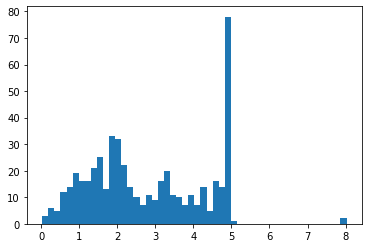

In [9]:
# plotting ages to determine decent value of total analysis time
plt.hist(c['age'].array, bins=50)

In [10]:
# From the graph we see that we can get a good amount of cryptos that are "older" than 4 years, take these
years = 4
crypstoclean = c[c['age'] > years]['Symbol'].reset_index(drop=True)

In [3]:
# make function to give you a dictionary with symbol and close prices for each crypto for the entire analysis time
# start and end date as string 'm/d/y'
# time interval as string ex: '1wk'
def analysisdata(symbols, startdate, enddate, tinterval):
    series = dict()
    for i in symbols:
        series[i] = get_data(i, start_date=startdate, end_date=enddate, index_as_date=True, interval=tinterval)['close']
    return series

In [12]:
# turn dictionary into a DataFrame
#use entire analysis time to determine which we symbols we will use
crypstocleandata = pd.DataFrame.from_dict(analysisdata(crypstoclean, '091718', today, '1wk'))

In [13]:
# array of which cryptos to drop from data (mean has to be greater than 1.01 or less than .98 over the entire time to not be considered stable coin)
drop = (crypstocleandata.mean()<.98).array + (crypstocleandata.mean()>1.01).array
crypstocleandata.head()

,BTC-USD,ETH-USD,USDT-USD,BNB-USD,XRP-USD,ADA-USD,DOGE-USD,TRX-USD,ETC-USD,LTC-USD,...,RFR-USD,UPP-USD,BCD-USD,PIVX-USD,ELA-USD,SBD-USD,PRE-USD,MONA-USD,BLZ-USD,GRS-USD
2018-09-17,6710.629883,244.330002,0.999512,10.28060,0.570689,0.089754,0.005901,0.023791,11.59860,61.366402,...,0.004136,0.027492,2.06767,0.977504,7.35875,1.025670,0.095707,1.37821,0.128594,0.578899
2018-09-24,6625.560059,232.848007,1.000360,10.01780,0.581572,0.085195,0.005906,0.022165,11.33200,61.141899,...,0.004403,0.026501,1.94940,1.111900,7.13009,1.011630,0.080757,1.33755,0.128123,0.559743
2018-10-01,6602.950195,226.119003,0.996617,10.51900,0.482039,0.084658,0.005562,0.026875,10.89810,58.160301,...,0.004507,0.026545,1.95133,1.073080,7.94287,0.983768,0.055097,1.15220,0.131439,0.550885
2018-10-08,6290.930176,195.714996,0.989570,9.49674,0.403286,0.071293,0.005158,0.023622,9.40812,52.187401,...,0.004916,0.028331,1.70589,1.111680,8.10389,1.015540,0.056346,1.15861,0.119386,0.540607
2018-10-15,6482.350098,205.141998,0.983548,9.74330,0.456694,0.075873,0.004517,0.024196,9.64013,52.915798,...,0.005640,0.027628,1.72449,1.305840,8.90458,1.001930,0.062904,1.15259,0.131991,0.544585


In [16]:
# final array with cryptos for analysis
cryptos = list(crypstocleandata.loc[:, drop ].columns)
cryptos

['BTC-USD',
 'ETH-USD',
 'BNB-USD',
 'XRP-USD',
 'ADA-USD',
 'DOGE-USD',
 'TRX-USD',
 'ETC-USD',
 'LTC-USD',
 'LINK-USD',
 'XLM-USD',
 'XMR-USD',
 'BCH-USD',
 'VET-USD',
 'FIL-USD',
 'XTZ-USD',
 'MANA-USD',
 'QNT-USD',
 'EOS-USD',
 'THETA-USD',
 'KCS-USD',
 'ZEC-USD',
 'MIOTA-USD',
 'HT-USD',
 'MKR-USD',
 'NEO-USD',
 'SNX-USD',
 'NEXO-USD',
 'ENJ-USD',
 'BAT-USD',
 'DASH-USD',
 'WAVES-USD',
 'ZIL-USD',
 'RVN-USD',
 'LRC-USD',
 'CEL-USD',
 'BTG-USD',
 'XEM-USD',
 'DCR-USD',
 'HOT1-USD',
 'XDC-USD',
 'GNO-USD',
 'QTUM-USD',
 'IOTX-USD',
 'GLM-USD',
 'FLUX-USD',
 'RPL-USD',
 'OMG-USD',
 'ZRX-USD',
 'IOST-USD',
 'ICX-USD',
 'ONT-USD',
 'STORJ-USD',
 'WAXP-USD',
 'SC-USD',
 'POLY-USD',
 'VGX-USD',
 'ZEN-USD',
 'ERG-USD',
 'CHSB-USD',
 'DGB-USD',
 'CVC-USD',
 'MED-USD',
 'LSK-USD',
 'EURS-USD',
 'CEEK-USD',
 'SYS-USD',
 'REN-USD',
 'SNT-USD',
 'MAID-USD',
 'ONG1-USD',
 'XNO-USD',
 'MVL-USD',
 'REQ-USD',
 'RLC-USD',
 'ARDR-USD',
 'DENT-USD',
 'POWR-USD',
 'UQC-USD',
 'XYO-USD',
 'NMR-USD',
 '

In [4]:
cryptos = ['BTC-USD',
 'ETH-USD',
 'BNB-USD',
 'XRP-USD',
 'ADA-USD',
 'DOGE-USD',
 'TRX-USD',
 'ETC-USD',
 'LTC-USD',
 'LINK-USD',
 'XLM-USD',
 'XMR-USD',
 'BCH-USD',
 'VET-USD',
 'FIL-USD',
 'XTZ-USD',
 'MANA-USD',
 'QNT-USD',
 'EOS-USD',
 'THETA-USD',
 'KCS-USD',
 'ZEC-USD',
 'MIOTA-USD',
 'HT-USD',
 'MKR-USD',
 'NEO-USD',
 'SNX-USD',
 'NEXO-USD',
 'ENJ-USD',
 'BAT-USD',
 'DASH-USD',
 'WAVES-USD',
 'ZIL-USD',
 'RVN-USD',
 'LRC-USD',
 'CEL-USD',
 'BTG-USD',
 'XEM-USD',
 'DCR-USD',
 'HOT1-USD',
 'XDC-USD',
 'GNO-USD',
 'QTUM-USD',
 'IOTX-USD',
 'GLM-USD',
 'FLUX-USD',
 'RPL-USD',
 'OMG-USD',
 'ZRX-USD',
 'IOST-USD',
 'ICX-USD',
 'ONT-USD',
 'STORJ-USD',
 'WAXP-USD',
 'SC-USD',
 'POLY-USD',
 'VGX-USD',
 'ZEN-USD',
 'ERG-USD',
 'CHSB-USD',
 'DGB-USD',
 'CVC-USD',
 'MED-USD',
 'LSK-USD',
 'EURS-USD',
 'CEEK-USD',
 'SYS-USD',
 'REN-USD',
 'SNT-USD',
 'MAID-USD',
 'ONG1-USD',
 'XNO-USD',
 'MVL-USD',
 'REQ-USD',
 'RLC-USD',
 'ARDR-USD',
 'DENT-USD',
 'POWR-USD',
 'UQC-USD',
 'XYO-USD',
 'NMR-USD',
 'BNT-USD',
 'STEEM-USD',
 'DAG-USD',
 'TEL-USD',
 'QKC-USD',
 'FUN-USD',
 'REP-USD',
 'STRAX-USD',
 'LOOM-USD',
 'MTL-USD',
 'XWC-USD',
 'STMX-USD',
 'REV1-USD',
 'ADS-USD',
 'ELF-USD',
 'VERI-USD',
 'VTHO-USD',
 'ANT-USD',
 'NKN-USD',
 'TRAC-USD',
 'AGIX-USD',
 'ETN-USD',
 'PRO-USD',
 'IQ-USD',
 'ARK-USD',
 'XVG-USD',
 'UTK-USD',
 'MFT-USD',
 'DERO-USD',
 'CXO-USD',
 'GXC-USD',
 'TIME-USD',
 'MLN-USD',
 'TOMO-USD',
 'AVA-USD',
 'CENNZ-USD',
 'WAN-USD',
 'KMD-USD',
 'BTS-USD',
 'FIRO-USD',
 'BMX-USD',
 'AOG-USD',
 'MOC-USD',
 'RFR-USD',
 'UPP-USD',
 'BCD-USD',
 'PIVX-USD',
 'ELA-USD',
 'SBD-USD',
 'PRE-USD',
 'MONA-USD',
 'BLZ-USD',
 'GRS-USD']

# Get all R matrices for Cryptos

In [37]:
# get n R matrices for our crypto symbols, input a start/end date as a string 'mdy', input epoch in integer days
# function calculates number n of matrices it will make (be careful must check it is an integer beforehand)
# initializes an empty array
# loops through starting at the original start date and gives a dictionary which we turn into a dataframe
# once a dataframe we perform some math operators and drop the first row (returns NaN values)
# then becomes R dataframe (matrix) and we append it to our array
# Does this for the entire data time and then returns the list of all the matrices
# note; here we make our R matrix have 1 day time intervals between data points 
# overlap is how much the corr matrices will overlap value from 0 to 1 (no overlap to no movement [dont use 1 ever])
def rmatrices(startdate, enddate, epoch, overlap, cryptosymbols):
    start_time = time.time()
    n = int((datetime.strptime(enddate, '%m%d%y') - datetime.strptime(startdate, '%m%d%y')).days/epoch)
    matrices = list()
    print('expected number of matrices:', 2*n)
    for i in range(2*n):
        print("Working on generating matrix:", i)
        temp_time = time.time()
        tempdict = analysisdata(cryptosymbols, datetime.strftime(datetime.strptime(startdate, '%m%d%y') + timedelta(days = i*(epoch-(overlap*epoch))), '%m%d%y'), datetime.strftime(datetime.strptime(startdate, '%m%d%y') + timedelta(days= epoch + (i * (epoch -(overlap*epoch)))), '%m%d%y'), tinterval= '1d')
        tempdf = pd.DataFrame.from_dict(tempdict)
        tempdftwo = np.log(tempdf).diff()
        r = tempdftwo.drop(index=tempdftwo.index[0])
        matrices.append(r)
        print("This took --- %s seconds ---" % (time.time() - temp_time))
    print("--- %s seconds ---" % (time.time() - start_time))
    return matrices

In [38]:
# generate all R matrices in a list
rmatrix = rmatrices('091718','091722',20, .5, cryptos)

expected number of matrices: 146
Working on generating matrix: 0
This took --- 12.047322988510132 seconds ---
Working on generating matrix: 1
This took --- 12.358637809753418 seconds ---
Working on generating matrix: 2
This took --- 12.524312019348145 seconds ---
Working on generating matrix: 3
This took --- 63.56769394874573 seconds ---
Working on generating matrix: 4
This took --- 83.54803204536438 seconds ---
Working on generating matrix: 5
This took --- 58.210360050201416 seconds ---
Working on generating matrix: 6
This took --- 11.96937084197998 seconds ---
Working on generating matrix: 7
This took --- 38.15921998023987 seconds ---
Working on generating matrix: 8
This took --- 83.45086288452148 seconds ---
Working on generating matrix: 9
This took --- 81.81622886657715 seconds ---
Working on generating matrix: 10
This took --- 11.44859504699707 seconds ---
Working on generating matrix: 11
This took --- 17.224704027175903 seconds ---
Working on generating matrix: 12
This took --- 8

This took --- 14.082614660263062 seconds ---
Working on generating matrix: 107
This took --- 77.86813998222351 seconds ---
Working on generating matrix: 108
This took --- 86.0233302116394 seconds ---
Working on generating matrix: 109
This took --- 36.41126465797424 seconds ---
Working on generating matrix: 110
This took --- 13.91420292854309 seconds ---
Working on generating matrix: 111
This took --- 56.03361105918884 seconds ---
Working on generating matrix: 112
This took --- 84.27413868904114 seconds ---
Working on generating matrix: 113
This took --- 61.542495012283325 seconds ---
Working on generating matrix: 114
This took --- 13.18752384185791 seconds ---
Working on generating matrix: 115
This took --- 33.30362129211426 seconds ---
Working on generating matrix: 116
This took --- 85.0958001613617 seconds ---
Working on generating matrix: 117
This took --- 80.58665919303894 seconds ---
Working on generating matrix: 118
This took --- 13.785056114196777 seconds ---
Working on generati

In [66]:
#rdata = {'data': rmatrix}
#rdatadict = pd.DataFrame(rdata)
#rdatadict.to_csv('rmatrices.csv')
rdatadict.to_dict()['data'].items()

dict_items([(0,              BTC-USD   ETH-USD   BNB-USD   XRP-USD   ADA-USD  DOGE-USD  \
2018-09-18  0.014242  0.059353  0.014650  0.167392  0.083015 -0.042873   
2018-09-19  0.004266 -0.000029  0.007831  0.012943  0.041196 -0.064215   
2018-09-20  0.018754  0.067321  0.046258  0.322005  0.119002  0.015216   
2018-09-21  0.032487  0.093422  0.032836  0.221479  0.072332 -0.001933   
2018-09-22 -0.001928 -0.025066 -0.016054  0.016491 -0.051686  0.012935   
2018-09-23 -0.001690  0.015883  0.003469 -0.000191  0.075909  0.024532   
2018-09-24 -0.017319 -0.065978 -0.024090 -0.142869 -0.081200 -0.038699   
2018-09-25 -0.022841 -0.045733 -0.025506  0.063113 -0.021078  0.001584   
2018-09-26  0.007500 -0.012239 -0.004767 -0.020385 -0.019340  0.001582   
2018-09-27  0.027599  0.056940  0.029805  0.047420  0.078904  0.031798   
2018-09-28 -0.004898 -0.027023 -0.006186 -0.004200 -0.023161 -0.008198   
2018-09-29 -0.006367  0.040676  0.002985  0.057865  0.006808  0.005814   
2018-09-30  0.003568  

In [73]:
# get averages of each R matrix and put them in a list
raverages = list()
for i in range(len(rmatrix)):
    raverages.append(rmatrix[i].mean().mean())
    

,BTC-USD,ETH-USD,BNB-USD,XRP-USD,ADA-USD,DOGE-USD,TRX-USD,ETC-USD,LTC-USD,LINK-USD,...,RFR-USD,UPP-USD,BCD-USD,PIVX-USD,ELA-USD,SBD-USD,PRE-USD,MONA-USD,BLZ-USD,GRS-USD
2018-09-28,-0.004898,-0.027023,-0.006186,-0.004200,-0.023161,-0.008198,-0.023784,-0.013926,-0.017367,-0.031173,...,-0.030723,0.003579,-0.004757,0.012719,-0.021355,-0.012628,-0.022395,0.006763,-0.014747,-0.015469
2018-09-29,-0.006367,0.040676,0.002985,0.057865,0.006808,0.005814,0.002590,0.012743,-0.004667,-0.017408,...,0.005263,0.022766,0.007779,0.179670,-0.005284,0.007100,-0.028251,-0.005634,0.012387,0.000377
2018-09-30,0.003568,0.005223,0.001864,0.017946,0.006938,0.006966,0.005882,-0.006325,-0.007576,0.008156,...,0.004781,0.005904,0.019032,-0.069260,0.012679,-0.000415,-0.021378,-0.007040,0.049585,-0.000257
2018-10-01,-0.005439,-0.008973,-0.007428,-0.008827,-0.008558,0.006077,-0.005111,-0.010726,-0.015390,-0.020289,...,0.024676,-0.038112,-0.003052,-0.031622,0.003138,-0.011153,-0.012222,-0.016319,-0.015202,0.015392
2018-10-02,-0.005100,-0.015666,0.040708,-0.101471,-0.023283,-0.020058,0.001858,-0.003744,-0.008384,-0.012771,...,0.046963,-0.031984,0.016321,-0.007192,0.043825,-0.006862,-0.002812,-0.004272,0.013952,-0.016284
2018-10-03,-0.008195,-0.029899,-0.008299,0.013966,-0.021260,-0.020820,-0.022567,-0.004568,-0.038029,-0.034106,...,-0.030917,-0.016651,0.009642,-0.001544,0.053439,-0.013871,0.003764,-0.010935,-0.026753,-0.022278
2018-10-04,0.011331,0.007811,-0.001520,-0.002950,0.006354,-0.010398,0.049804,-0.006443,0.013857,0.033592,...,0.021785,-0.058469,0.022796,0.054246,0.022222,-0.001585,0.016900,-0.014534,0.008966,0.010037
2018-10-05,0.006938,0.023935,0.036439,-0.014499,0.020537,0.004243,0.024883,0.000597,0.008316,0.105091,...,0.002131,0.114486,-0.035729,0.001427,-0.016531,-0.002005,-0.206376,-0.025114,0.020379,-0.009293
2018-10-06,-0.005173,-0.010961,-0.025144,-0.061471,-0.020549,-0.022116,0.018728,-0.012334,-0.015815,-0.053010,...,-0.028944,-0.014107,0.000315,-0.048051,-0.020353,-0.004289,-0.069405,-0.058993,0.058014,-0.007210
2018-10-07,0.002220,0.004428,0.014064,-0.012458,0.040437,0.003061,0.125089,-0.001824,0.005452,-0.001364,...,-0.012349,0.046497,-0.009304,-0.002801,0.022210,0.011838,-0.112200,-0.018999,-0.033803,0.013684


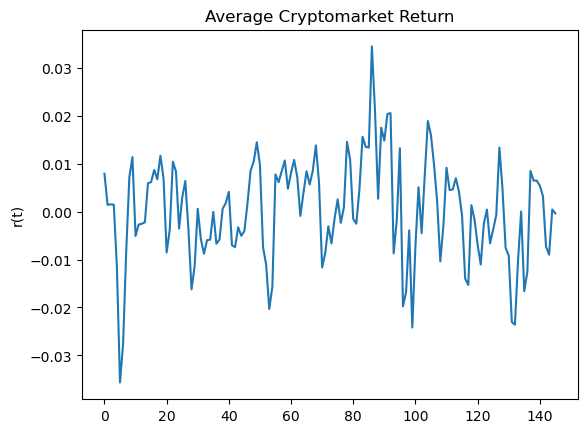

In [74]:
# going to plot r values. python will automatically plot in chronological order given how we constructed our data
labels = np.arange(2018,2022)
plt.style.use('default')
plt.plot(raverages)
plt.ylabel("r(t)")
plt.title('Average Cryptomarket Return')

#plt.locator_params(axis='x', nbins=10)
plt.show()

# Getting all C matrices for Cryptos

In [75]:
# Get a Correlation Matrix for each R matrix
corrmatrix = [i.corr(method='pearson') for i in rmatrix]

In [76]:
# Get average correlation for each matrix [MIGHT NEED TO COME BACK AND DO NOISE SUPRESSION FIRST] 
# might need to subtract 1 for every mean since we have diagonals
corraverages = [i.mean().mean() for i in corrmatrix]

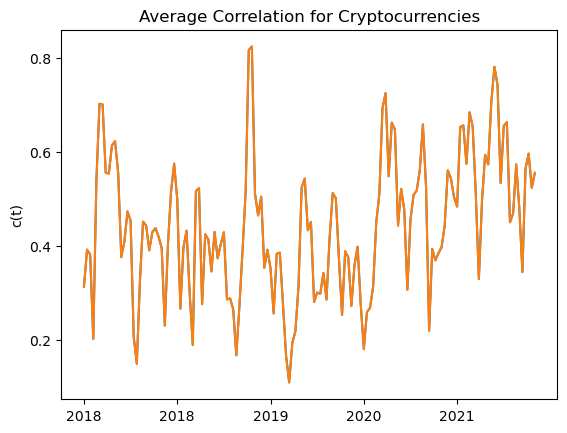

In [131]:
# Plot average correlation 
fig, ax = plt.subplots()
xcorr = np.arange(0,len(corraverages))
plt.style.use('default')
plt.plot(corraverages)
plt.ylabel("c(t)")
plt.title('Average Correlation for Cryptocurrencies')
labels = np.linspace(2018, 2022, num=len(xcorr), dtype=int)
plt.plot(xcorr, corraverages)
plt.xticks(xcorr, labels)
plt.locator_params(nbins=5)

plt.show()

In [130]:
len(corraverages)-len(xcorr)

0

# Noise Supression

In [78]:
# function which does power mapping for noise supresion, takes corr matrices and replaces each element by
# sign(C_ij)|C_ij|^(1+e)
def noisesupression(corrmatrices, e):
    for df in corrmatrices:
        for i,j in itertools.product(range(len(df.index)), range(len(df.columns))):
            df.iloc[i,j] = math.copysign(1,df.iloc[i,j])* abs((df.iloc[i,j]))**(1+e)
    return corrmatrices


In [79]:
# get supressed noise matrices
supcorrmatrix = noisesupression(corrmatrix, 0.1)

In [95]:
supcorrmatrix[0]

,BTC-USD,ETH-USD,BNB-USD,XRP-USD,ADA-USD,DOGE-USD,TRX-USD,ETC-USD,LTC-USD,LINK-USD,...,RFR-USD,UPP-USD,BCD-USD,PIVX-USD,ELA-USD,SBD-USD,PRE-USD,MONA-USD,BLZ-USD,GRS-USD
BTC-USD,1.000000,0.972801,0.806926,0.834719,0.957267,0.928827,0.830317,0.920344,0.976529,0.806703,...,0.527847,0.579908,0.819094,0.163579,0.542723,-0.641958,0.089859,0.603128,0.851677,0.781140
ETH-USD,0.972801,1.000000,0.848536,0.814489,0.969662,0.959825,0.825281,0.966148,0.973321,0.821777,...,0.633169,0.685663,0.794669,0.113469,0.534936,-0.692017,0.063369,0.578726,0.908273,0.844326
BNB-USD,0.806926,0.848536,1.000000,0.559163,0.821686,0.798654,0.740575,0.853352,0.823631,0.790856,...,0.592956,0.696216,0.701087,0.061722,0.480761,-0.686462,-0.009465,0.478539,0.730157,0.616037
XRP-USD,0.834719,0.814489,0.559163,1.000000,0.853788,0.838945,0.650299,0.817082,0.767220,0.658296,...,0.430552,0.528366,0.686935,0.234447,0.533672,-0.589359,0.171437,0.635637,0.673518,0.714497
ADA-USD,0.957267,0.969662,0.821686,0.853788,1.000000,0.964862,0.890309,0.937457,0.953904,0.770288,...,0.540753,0.693947,0.768260,0.098465,0.553017,-0.593737,0.044550,0.598403,0.815577,0.819086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SBD-USD,-0.641958,-0.692017,-0.686462,-0.589359,-0.593737,-0.576488,-0.482153,-0.799805,-0.595427,-0.496281,...,-0.578301,-0.407072,-0.813878,-0.013742,-0.405281,1.000000,-0.183708,-0.338763,-0.792919,-0.505100
PRE-USD,0.089859,0.063369,-0.009465,0.171437,0.044550,0.032244,-0.063432,0.132146,0.139234,-0.039253,...,0.313871,-0.304569,0.337901,0.423168,0.030011,-0.183708,1.000000,0.572521,0.225341,0.131786
MONA-USD,0.603128,0.578726,0.478539,0.635637,0.598403,0.634256,0.290399,0.600055,0.644542,0.451060,...,0.415680,0.201025,0.560870,0.325377,0.469611,-0.338763,0.572521,1.000000,0.548185,0.510505
BLZ-USD,0.851677,0.908273,0.730157,0.673518,0.815577,0.808407,0.649868,0.912350,0.880118,0.652096,...,0.679793,0.530423,0.822955,0.040144,0.399979,-0.792919,0.225341,0.548185,1.000000,0.753719


# Getting Similarity Matrix Elements to Use for Clustering

In [80]:
def getsimmatrix(supcorrmatrix):
    emptymat= np.ndarray(shape=(len(supcorrmatrix),len(supcorrmatrix)), dtype=float)
    print("matrix shape:",emptymat.shape)
    for i, j in itertools.product(range(len(supcorrmatrix)), range(len(supcorrmatrix))):
        emptymat[i,j] = abs(supcorrmatrix[i] - supcorrmatrix[j]).mean().mean()
    
    return emptymat

In [81]:
simmatrix = getsimmatrix(supcorrmatrix)

matrix shape: (146, 146)


# MDS Map for Similarity Matrix

In [83]:
# initialize MDS algo and fit it with our similarity matrix
# simtrans gives the new points in a reduced dimension n_components set by the MDS parameters
mds = MDS(n_components = 3, dissimilarity = 'precomputed')
simtrans = mds.fit_transform(simmatrix)

AttributeError: 'PathCollection' object has no property 'zs'

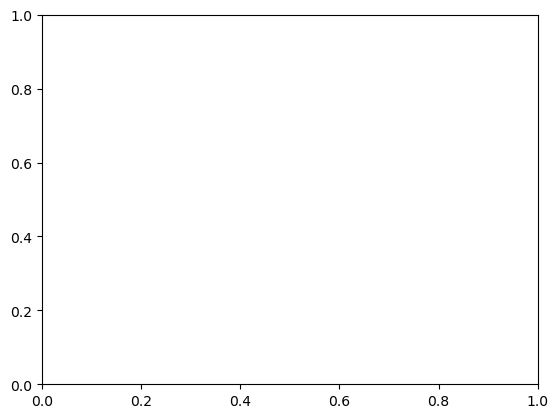

In [87]:
# simple example of what MDS is doing for a 3x3 similarity matrix (3 dimensions) into 2 dimensions
#colors = ['r', 'g', 'b', 'y']
#size = [64, 64, 64, 64]
#fig = plt.figure(2, (10,4))
#ax = fig.add_subplot(121, projection='3d')
#plt.scatter(simmatrix[:,0], simmatrix[:,1], zs=simmatrix[:,2], s=size, c = colors)
#plt.title('Original Points')

#ax = fig.add_subplot(122)
ax = fig.add_subplot(121, projection='3d')
plt.scatter(simtrans[:,0], simtrans[:,1], zs = simtrans[:,2])
plt.title('Embedding in 3D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

In [16]:
print(simtrans)

[[-0.11126923 -0.20875121]
 [ 0.03628202 -0.21844124]
 [ 0.15178151  0.12340402]
 [-0.07679429  0.30378842]]


In [15]:
print(simmatrix)

[[0.         0.15844589 0.40592118 0.52577535]
 [0.15844589 0.         0.37199275 0.52993185]
 [0.40592118 0.37199275 0.         0.2848113 ]
 [0.52577535 0.52993185 0.2848113  0.        ]]


# KMeans Clustering

In [27]:
# initialize K-Means clustering algorithm
# take the MDS reduced similarity matrix and use K-means clustering on it
km = KMeans(n_clusters=2, init='random')
y_km = km.fit_predict(simtrans)

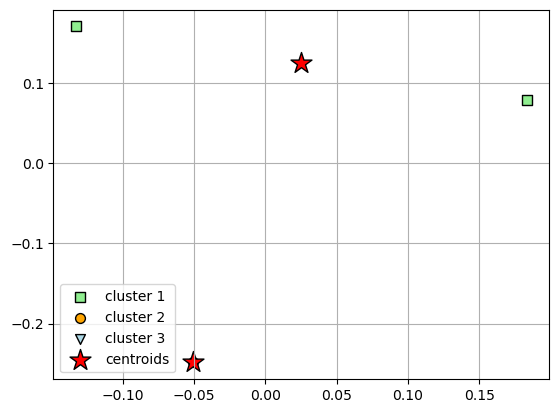

In [26]:
# plotting an example for these 3 points and doing a k=2 means clustering
plt.scatter(
    simtrans[y_km == 0, 0], simtrans[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    simtrans[y_km == 1, 0], simtrans[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    simtrans[y_km == 2, 0], simtrans[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# Get Average Intracluster Distance and STD for 1 KMeans Run

In [88]:
# function to get the average (of averages) and std (average of std) of intra-cluster distances for a 
# similarity matrix that has been transformed by MDS
def intraclusterdist(simtrans, kclusters):
    emptydict = {}
    avgstd = {}
    totals = []
    km = KMeans(n_clusters = kclusters, init ='random')
    y_km = km.fit_predict(simtrans)
    # make dictionary with cluster as key and all distances as values (array)
    for i in range(len(simtrans)):
        emptydict.setdefault(y_km[i], []).append(math.sqrt(sum((simtrans[i] - km.cluster_centers_[y_km[i]])**2)))
    # take the dictionary from above and get a new dictionary with cluster as key
    # and a value of [# of points in cluster, average distance, std]
    for key in emptydict:
        avg = sum(emptydict[key])/len(emptydict[key])
        avgstd.setdefault(key,[]).append(len(emptydict[key]))
        avgstd.setdefault(key, []).append(avg)
        # might be an error in how I calculate std here
        std = math.sqrt(sum([(dis-avg)**2 for dis in emptydict[key]])/len(emptydict[key]))
        avgstd.setdefault(key,[]).append(std)
    # now get weighted average (of average) intracluster distance and avg std (for unequal sample size)
    avgavgdis = 0 
    avgstdcounter = 0 
    for key in avgstd:
        avgavgdis += (avgstd[key][0]*avgstd[key][1])/len(simtrans)
        avgstdcounter += (avgstd[key][0]-1)*(avgstd[key][2]**2)
    avgavgstd = math.sqrt(avgstdcounter/(len(simtrans)-kclusters))
    

    return avgavgdis, avgavgstd
        

# Running KMeans 500 times with random parameters & getting AVG distance/STD for different Ks

In [89]:
# Function to do 500 runs of kmeans cluster for a given choice of k and a similarity matrix
# Given that no random_state seed is fed to the KMeans algo, we will have different random intial conditions
# for centroid initialization of our 500 runs
# This will get the total average distance and std of intracluster distance over 500 runs
def multikrun(simtrans, nruns, kclusters):
    avgsdict = {}
    for i in range(nruns):
       # km = KMeans(n_clusters = kclusters, init ='random')
       # y_km = km.fit_predict(simtrans)
        emp = intraclusterdist(simtrans, kclusters)
        avgsdict.setdefault('avgd', []).append(emp[0])
        avgsdict.setdefault('avgstd', []).append(emp[1])
    totalaveragedis = sum(avgsdict['avgd'])/nruns
    totalaveragestd = sum(avgsdict['avgstd'])/nruns
    
    return totalaveragedis, totalaveragestd
        

In [99]:
# function that gives a list of the avg intracluster dist and std for all values of k from 1 to highestk
# will use this to plot
def getkruns(simtrans, highestk):
    dlist = []
    stdlist = []
    for i in range(1,highestk+1):
        temp = multikrun(simtrans, nruns=500, kclusters = i)
        dlist.append(temp[0])
        stdlist.append(temp[1])
    return dlist , stdlist

(0.10964443516792306, 0.0)

In [102]:
firsttry = getkruns(simtrans, 10)

In [103]:
firsttry

([0.20336651640317885,
  0.15913338977053126,
  0.14158147006975272,
  0.1268661413623964,
  0.11585462520594272,
  0.1081368651156961,
  0.10113084483896079,
  0.09471971536368284,
  0.09004984114840076,
  0.08633907577732285],
 [0.06033081360801495,
  0.038497804070551915,
  0.03947508430296169,
  0.037904837012572495,
  0.032956145613616046,
  0.03251542872969172,
  0.03065841668592701,
  0.028375176800039648,
  0.026439685949070077,
  0.025380625603118778])

In [94]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

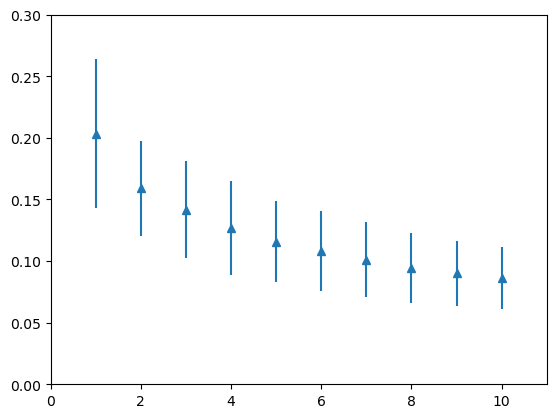

In [116]:
ax5 =plt.gca()

ax5.set_ylim([0, .3])
ax5.set_xlim([0, 11])
plt.errorbar(np.arange(1,11), firsttry[0], firsttry[1], linestyle='None', marker='^')
plt.locator_params(nbins=10)
plt.show()